<!-- PROJECT LOGO -->
<br />
<div align="center">
  <a>
    <!-- <img src="https://res.cloudinary.com/dek4evg4t/image/upload/v1725947133/Frame_10507_1.png" alt="Logo" width="40%"> -->
  </a>
</div>


### 🖹 Descripción: 
<!-- Este notebook tiene como objetivo principal aplicar diversas técnicas de clasificación de datos en el conjunto de datos provienente del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales, y su finalidad es predecir de manera diagnóstica si un paciente tiene diabetes, basándose en un conjunto de mediciones realizadas. Enlace: [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database). Con el fin de de explorar herramientas avanzadas de Machine Learning y contribuir al desarrollo del conocimiento a través de la investigación. -->

### ✍️ Autores: 
* Angelo Ortiz Vega - [@angelortizv](https://github.com/angelortizv)
* Alejandro Campos Abarca - [@MajinLoop](https://github.com/MajinLoop)

### 📅 Fecha: 
9 de octubre de 2024

### 📝 Notas: 
<!-- Este notebook es el primero de dos que forman parte del primer proyecto del curso IC6200 - Inteligencia Artificial. Este notebook está titulado "diabetes", mientras que el siguiente se llama "alzheimer". -->

### Otras notas:
<!-- - Asegurarse de que Python esté instalado, junto con las bibliotecas necesarias: pandas, numpy, matplotlib, seaborn, scipy, ydata_profiling, utils. -->


# Importación de Librerías

In [26]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import torch

# Verifica si CUDA está disponible y si hay GPUs disponibles
print("CUDA Available: ", torch.cuda.is_available())
print("Number of GPUs: ", torch.cuda.device_count())
print("Current GPU: ", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")


## verificar version de Tensorflow

In [27]:
print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2.6.0
Num GPUs Available:  1


# Definición de Constantes

In [28]:
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 32
EPOCHS = 10
TRAIN_DATA_PATH = 'data/Covid19-dataset/train'
TEST_DATA_PATH = 'data/Covid19-dataset/test'
IMAGE_DATA_GENERATOR_RESCALE = 1./255


# Creación de los dataframes

In [29]:
"""
Un train_generator en Keras es un generador de datos que carga y procesa imágenes en lotes durante el entrenamiento de un modelo,
optimizando el uso de memoria. Suele utilizar ImageDataGenerator para aplicar aumentos de datos, como rotaciones y desplazamientos,
mejorando la generalización del modelo. Este generador permite entrenar modelos sobre grandes conjuntos de datos sin necesidad de
cargarlos completamente en memoria. Se integra fácilmente con el método fit de Keras.
"""

def get_generator(path, target_size=(IMG_HEIGHT, IMG_WIDTH), batch_size=BATCH_SIZE, class_mode='categorical'):
    image_data_generator = ImageDataGenerator(rescale=IMAGE_DATA_GENERATOR_RESCALE)
    generator = image_data_generator.flow_from_directory \
    (
        path,
        target_size=target_size,
        batch_size=batch_size,
        class_mode=class_mode
    )
    # 'categorical' para más de dos clases
    return generator

# Carga de datos de entrenamiento
train_generator = get_generator(TRAIN_DATA_PATH)

# Carga de datos de prueba
test_generator = get_generator(TEST_DATA_PATH)

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [30]:
# train_generator.shape

# 7. Exploratory Data Analysis (EDA)

## 7.1. Gráficos de barras de características agrupadas por diabetes

## 7.2. Informe de correlación de características de la diabetes

## 7.3. Visualización de relación entre características

# 8. Reducción de dimensionalidad

## 8.1. Manejo de valores con 0 

## 8.2 Visualización de relación entre características después del manejo de datos

# 9. División del dataframe

# Creación del modelo

In [31]:
model = models.Sequential \
(
    [
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(3, activation='softmax')  # 3 categorías
    ]
)

model.compile \
(
    optimizer='adam',
    loss='categorical_crossentropy',  # Usar 'sparse_categorical_crossentropy' si las etiquetas son enteros
    metrics=['accuracy']
)

# Entrenamiento del modelo

In [32]:
# Training with validation generator
# history = model.fit \
# (
#     train_generator,
#     steps_per_epoch=train_generator.samples // BATCH_SIZE,
#     validation_data=validation_generator,
#     validation_steps=validation_generator.samples // BATCH_SIZE,
#     epochs=EPOCHS
# )

# For some reason using testing set as validation set
# history = model.fit \
# (
#     train_generator,
#     steps_per_epoch=train_generator.samples // BATCH_SIZE,
#     validation_data=test_generator,
#     validation_steps=test_generator.samples // BATCH_SIZE,
#     epochs=EPOCHS
# )

# With only training set
history = model.fit(train_generator, epochs=EPOCHS)

Epoch 1/10
8/8 [==============================] - 26s 3s/step - loss: 1.2514 - accuracy: 0.3665
Epoch 2/10
8/8 [==============================] - 23s 2s/step - loss: 0.6466 - accuracy: 0.8008
Epoch 3/10
8/8 [==============================] - 19s 2s/step - loss: 0.3391 - accuracy: 0.8645
Epoch 4/10
8/8 [==============================] - 33s 4s/step - loss: 0.2163 - accuracy: 0.9243
Epoch 5/10
8/8 [==============================] - 32s 3s/step - loss: 0.1424 - accuracy: 0.9442
Epoch 6/10
8/8 [==============================] - 27s 2s/step - loss: 0.1109 - accuracy: 0.9602
Epoch 7/10
8/8 [==============================] - 45s 5s/step - loss: 0.0829 - accuracy: 0.9602
Epoch 8/10
8/8 [==============================] - 46s 5s/step - loss: 0.0648 - accuracy: 0.9721
Epoch 9/10
8/8 [==============================] - 36s 4s/step - loss: 0.0675 - accuracy: 0.9641
Epoch 10/10
8/8 [==============================] - 35s 4s/step - loss: 0.0595 - accuracy: 0.9721


# Evaluacion del modelo

3/3 [==============================] - 9s 457ms/step - loss: 0.5863 - accuracy: 0.8182
Test accuracy: 0.8181818127632141


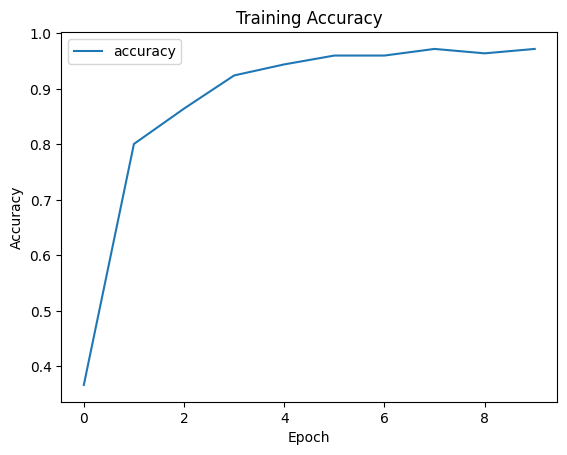

In [33]:
# # Evaluar el modelo con validacion
# loss, accuracy = model.evaluate(test_generator)
# print(f'Test accuracy: {accuracy}')
# plt.plot(history.history['accuracy'], label='accuracy')
# plt.plot(history.history['val_accuracy'], label='val_accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()
"""
val_accuracy (precisión de validación): Mide la precisión del modelo sobre los datos de validación, es decir, datos que no se utilizaron
durante el entrenamiento, pero que se emplean para evaluar cómo de bien generaliza el modelo a datos nuevos o desconocidos.
"""

# Evaluar el modelo
loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy}')
plt.plot(history.history['accuracy'], label='accuracy')  # Solo la precisión de entrenamiento
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()
plt.show()

accuracy (precisión): Es la métrica que mide la precisión del modelo sobre los datos de entrenamiento. Representa el porcentaje de predicciones correctas que hizo el modelo sobre los ejemplos con los que fue entrenado.

